In [202]:
import json as json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as md
from datetime import datetime as dt
from datetime import time
%matplotlib inline

In [512]:

#b='2017-12-3_22_40_49'
#b='2017-12-4_08_29_56'
#b='2017-12-4_12_42_02'
#b='2017-12-4_23_54_54'
#b='2017-12-5_08_03_15'
#b='2017-12-5_15_26_18'
b='2017-12-6_09_37_59'
#b='2017-12-6_15_46_29'
b='2017-12-6_21_51_48'
b='2017-12-7_09_52_57'
doc='/Users/celine/Documents/workspace/hbzb/priceData/'+b+'.json'


In [513]:
file=open(doc,'r')

In [514]:
a=json.load(open(doc))

In [515]:
df=pd.DataFrame(a)


In [516]:
df.tail()

,buyHBRate,buyHbAvg,hbBuyP,hbSellP,sellHBRate,sellHbAvg,tm,ts,zbBuyP,zbSellP
7534,1529.90,1555.04,16300.00,16298.11,-1614.48,-1756.25,2017-12-7|22:59:33,2017-12-08T03:59:33.470Z,17879.99,17862.57
7535,1529.90,1554.86,16300.00,16298.11,-1614.48,-1755.16,2017-12-7|22:59:37,2017-12-08T03:59:37.470Z,17879.99,17862.57
7536,1529.90,1554.18,16300.00,16290.62,-1621.96,-1753.81,2017-12-7|22:59:41,2017-12-08T03:59:41.481Z,17880.00,17862.57
7537,1497.24,1553.34,16350.00,16310.21,-1722.41,-1753.19,2017-12-7|23:00:13,2017-12-08T04:00:13.511Z,18000.00,17880.01
7538,1482.43,1552.75,16374.75,16310.01,-1721.61,-1752.62,2017-12-7|23:00:17,2017-12-08T04:00:17.514Z,17999.00,17890.0


In [517]:
t=[datetime.strptime(x,'%Y-%m-%d|%H:%M:%S') for x in df['tm']]

In [518]:
df.shape[0]



7539

In [519]:
HB=[float(x) for x in df['buyHBRate']]
ZB=[-float(x) for x in df['sellHBRate']]
HBa=[float(x) for x in df['buyHbAvg']]
ZBa=[-float(x) for x in df['sellHbAvg']]
hbBuy=[float(x) for x in df['hbBuyP']]
zbSell=[float(x) for x in df['zbSellP']]
hbSell=[float(x) for x in df['hbSellP']]
zbBuy=[float(x) for x in df['zbBuyP']]

In [520]:
#check1=[(y-x*1.002) for x,y in zip(hbBuy,zbSell)]
#check2=[x*0.998 - y for x,y in zip(hbSell,zbBuy)]
#check1hb=[x-y for x,y in zip(check1,HB)]
#check2zb=[x-y for x,y in zip(check2,ZB)]
#check1[0]
hbStd=np.std(HBa)
zbStd=np.std(ZBa)

In [521]:
stdP=[]
for i in np.arange(df.shape[0]):
    if i<200:
        stdP.append(np.std(HB[0:i]))
    else:
        stdP.append(np.std(HB[i-200:i-1]))
stdN=[]
for i in np.arange(df.shape[0]):
    if i<200:
        stdN.append(np.std(ZB[0:i]))
    else:
        stdN.append(np.std(ZB[i-200:i-1]))

/Users/celine/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/celine/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/celine/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [522]:
hbStd

348.07475432693229

In [523]:
zbStd

339.43707980010998

In [524]:
meanP=np.mean(HBa)
meanN=np.mean(ZBa)
pbond=[x+y for x,y in zip(HBa,stdP)]
nbond=[x-y for x,y in zip(ZBa,stdN)]

/Users/celine/anaconda/lib/python3.6/site-packages/matplotlib/ticker.py:1455: UserWarning: 'set_params()' not defined for locator of type <class 'pandas.plotting._converter.PandasAutoDateLocator'>
  str(type(self)))


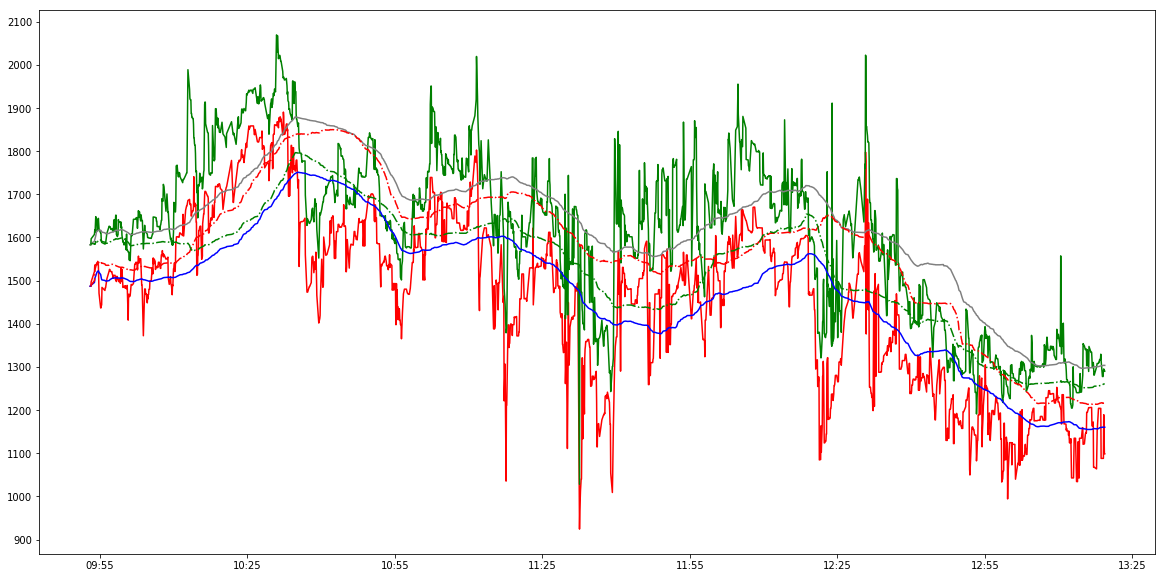

In [529]:
m=0
n=2000
fig,ax=plt.subplots(figsize=(20,10))
ax.plot(t[m:n],HB[m:n],color='r')
ax.plot(t[m:n],ZB[m:n],color='g')
ax.plot(t[m:n],HBa[m:n],color='blue')
ax.plot(t[m:n],ZBa[m:n],color='grey')
#ax.axhline(y=meanP,ls='-',color='r')
ax.plot(t[m:n],pbond[m:n],ls='-.',color='r')
#ax.axhline(y=meanN,ls='-',color='g')
ax.plot(t[m:n],nbond[m:n],ls='-.',color='g')
#fig.autofmt_xdate()
ax.locator_params(nbins=20)
#ax.set_ylim([0,500])
ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M'))


In [526]:
fig.savefig(str(t[0])+'_MA.jpg')

/Users/celine/anaconda/lib/python3.6/site-packages/matplotlib/ticker.py:1455: UserWarning: 'set_params()' not defined for locator of type <class 'pandas.plotting._converter.PandasAutoDateLocator'>
  str(type(self)))


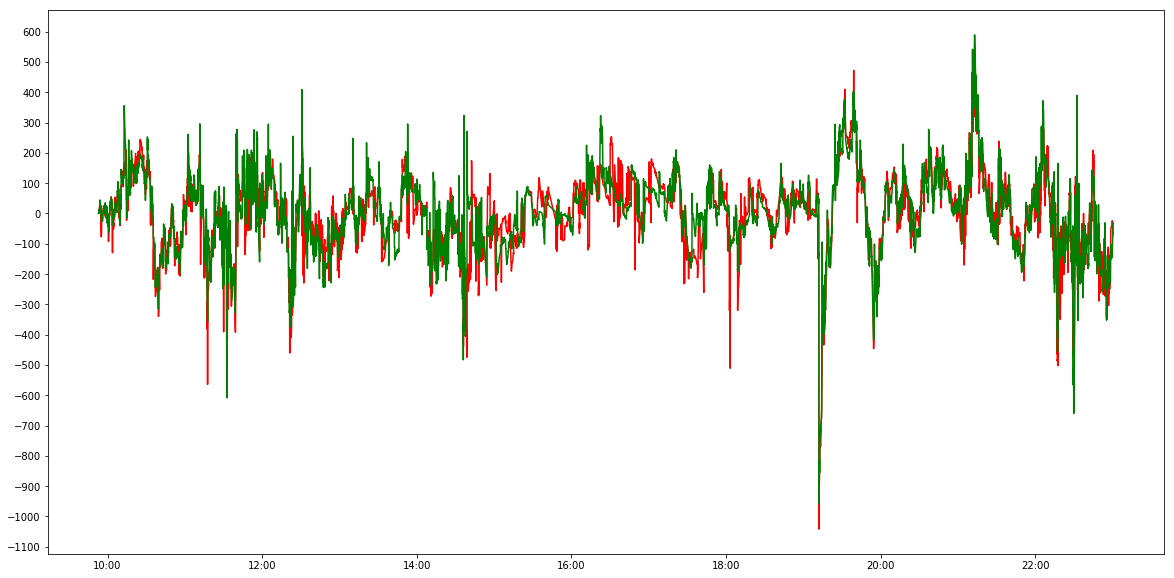

In [527]:
x1=[x-y for x,y in zip(HB,HBa)]
x2=[x-y for x,y in zip(ZB,ZBa)]

fig1,ax1=plt.subplots(figsize=(20,10))
ax1.plot(t,x1,color='r')
ax1.plot(t,x2,color='g')
ax1.locator_params(nbins=20)
ax1.xaxis.set_major_formatter(md.DateFormatter('%H:%M'))


In [528]:
fig1.savefig(str(t[0])+'_diff.jpg')